- 马尔可夫性：给定当前状态，下一步的状态只与当前状态有关，而与过去的历史无关
    - $P(X_{t+1}=j|X_t=i,X_{t-1}=i-1,\cdots,X_0=i_0)=P(X_{t+1}=j|X_t=i)$
    - 如果状态空间是有限的，通常用一个 $N\times N$的概率转移矩阵 $P$来刻画马尔可夫链
        - $P_{ij}=P(X_{t+1}=j|X_t=i)$
        - 行和为1，即任一状态 $i$ 出发，转移到所有可能状态的概率之和为1；
- 稳态分布（stationary distribution）
    - 若存在一个概率向量 $\mathbf{\pi}=(\pi_1,\pi_2,\cdots,\pi_N)$，使得无论初始分布如何，当 $t$ 很大时，马尔可夫链的分布趋近于 $\mathbf\pi$，则称 $\mathbf\pi$ 为稳态分布
        - $\mathbf\pi P=\mathbf\pi$
    - 并非所有的马尔可夫链都存在稳态分布（Stationary Distribution）。稳态分布的存在性和唯一性取决于马尔可夫链的性质，如其是否不可约、周期性以及状态的遍历性等。
- 细致平稳条件（detailed balance）
    - 细致平稳条件，又称详细平衡条件或微观可逆性条件，指的是在稳态分布 $\pi$ 下，系统从状态 $i$ 转移到状态 $j$ 的概率流和从状态 $j$ 转移到状态 $i$ 的概率流相同
    - $\pi_iP_{ij}=\pi_jP_{ji},\forall i,j$
    - 如果某马尔可夫链的稳态分布 $\pi$ 满足细致平稳条件，则称该马尔可夫链是可逆的（reversible）
    - 满足细致平衡条件的概率分布 $\pi$ 必然是马尔可夫链的一个稳态分布
        - $\sum_i \pi_iP_{ij}=\sum_i\pi_jP_{ji}=\pi_j\sum_iP(ji)=\pi_j$
        - $\pi P=\pi$

### 2 状态马尔可夫链（满足细致平稳条件)

$$
P=\begin{pmatrix}
0.6 & 0.4 \\
0.2 & 0.8
\end{pmatrix}
$$

- $P_{11}=0.6$: 表示当前在状态 1 时，以 0.6 的概率留在状态 1，以 0.4 的概率转移到状态 2；
- $P_{22}=0.8$: 表示当前在状态 2 时，以 0.8 的概率留在状态 2，以 0.2 的概率转移到状态 1)；
- 求其稳态分布 $\pi=(\pi_1,\pi_2)=(\frac 13,\frac 23)$
- 验证细致平稳条件：$\pi_1P_{12}=\pi_2P_{21}$
    - 1/3 * 0.4 == 2/3 * 0.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 转移矩阵
P = np.array([
    [0.6, 0.4],
    [0.2, 0.8]
])


In [4]:
# ---------- (1) 迭代法求稳态分布 ----------

def iterate_stationary(P, max_iter=1000, tol=1e-12):
    """
    通过迭代方法数值求稳态分布: 令 mu_{t+1} = mu_t * P.
    """
    n = P.shape[0]
    # 随机给个初始分布
    mu = np.ones(n) / n  # 比如取 [0.5, 0.5]
    for i in range(max_iter):
        new_mu = mu @ P
        if np.linalg.norm(new_mu - mu) < tol:
            print(f'convergence at iter: {i}')
            break
        mu = new_mu
    return new_mu

mu_stationary = iterate_stationary(P)
print("数值迭代得到的稳态分布:", mu_stationary)

convergence at iter: 29
数值迭代得到的稳态分布: [0.33333333 0.66666667]


In [5]:
# ---------- (2) 随机模拟并估计分布 ----------

def simulate_markov_chain(P, T=10000, start_state=0):
    """
    在给定的转移矩阵 P 下进行 T 步模拟，
    返回每个时刻的状态序列（状态从 0 开始标号）
    """
    states = [start_state]
    for t in range(T):
        current = states[-1]
        next_state = np.random.choice(len(P), p=P[current])
        states.append(next_state)
    return states


In [6]:
T = 10_000
start_state = 0  # 从状态0开始
states = simulate_markov_chain(P, T=T, start_state=start_state)
states_arr = np.array(states)

In [7]:
# 估计每个状态在后期出现的频率
burn_in = 1000  # 前1000步不计入统计，视作“热身”以逼近稳态
freq_state_0 = np.mean(states_arr[burn_in:] == 0)
freq_state_1 = np.mean(states_arr[burn_in:] == 1)

In [8]:
print("模拟后得到的状态占比: (state0, state1) =", (freq_state_0, freq_state_1))

模拟后得到的状态占比: (state0, state1) = (0.34562826352627485, 0.6543717364737252)


Text(0, 0.5, 'state')

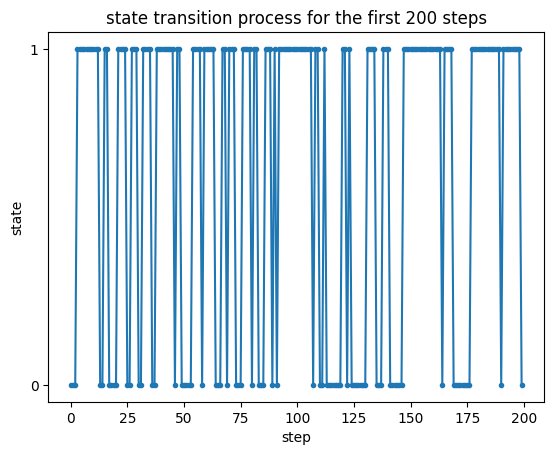

In [12]:
# plt.figure(figsize=(8, 3))
plt.plot(states_arr[:200], '-o', markersize=3)
plt.yticks([0, 1])
plt.title("state transition process for the first 200 steps")
plt.xlabel("step")
plt.ylabel("state")

### 3 状态马尔可夫链（不满足细致平稳）

- 在一些应用场合下，马尔可夫链存在稳态分布，但并不满足细致平稳条件（也就是不可逆）。下面构造一个 3 状态 示例。
- 我们设状态空间为 $\{0,1,2\}$，并定义转移矩阵
$$
P=\begin{pmatrix}
0.5 & 0.2 & 0.3\\
0.3 & 0.5 & 0.2\\
0.2 & 0.3 & 0.5
\end{pmatrix}
$$
- 求得稳态分布是 $(1/3,1/3,1/3)$

In [13]:
P = np.array([
    [0.5, 0.2, 0.3],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
])

In [14]:
# ---------- (1) 迭代求稳态分布 ----------
mu_stationary = iterate_stationary(P)
print("3状态马尔可夫链的数值稳态分布:", mu_stationary)

convergence at iter: 0
3状态马尔可夫链的数值稳态分布: [0.33333333 0.33333333 0.33333333]


In [15]:
# ---------- (2) 随机模拟 ----------
states_3 = simulate_markov_chain(P, T=10000, start_state=0)
states_3_arr = np.array(states_3)
burn_in = 1000
freq = []
for i in range(3):
    freq.append(np.mean(states_3_arr[burn_in:] == i))

print("3状态马尔可夫链的模拟占比:", freq)

3状态马尔可夫链的模拟占比: [0.3420731029885568, 0.32663037440284415, 0.33129652260859904]


### random walk

经过t步后，粒子位置的分布近似于 $N(0, t)$，其中：
- 均值为0（因为向左向右概率相等）
- 方差为$t=\sqrt t^2$（每步的方差为1，t步后方差累加）

In [19]:
from tqdm.notebook import tqdm

  0%|          | 0/1000 [00:00<?, ?it/s]

Empirical mean: 4.38
Empirical std: 323.70
Theoretical std: 316.23


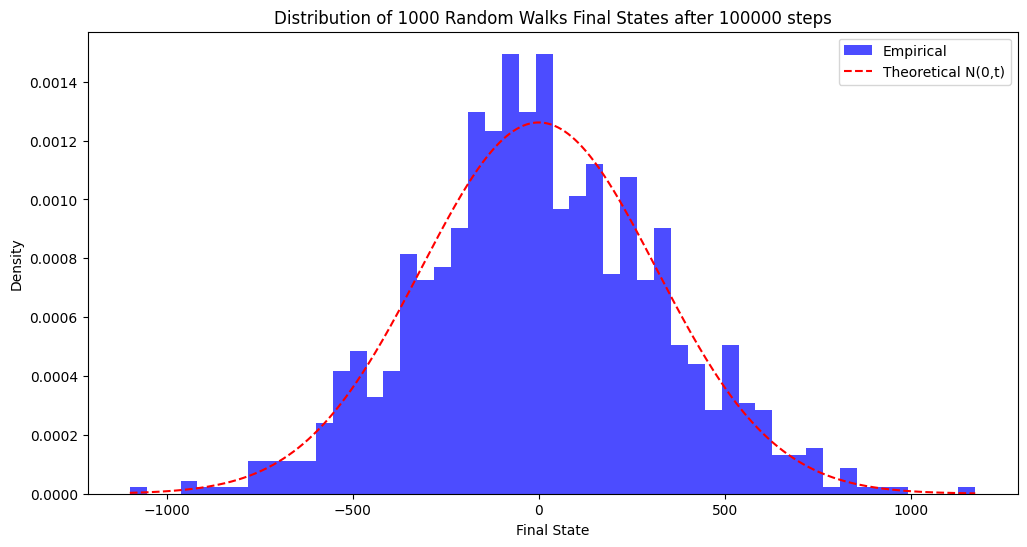

In [31]:
def simulate_multiple_walks(n_trials=1000, T=100000, start_state=0):
    # 存储所有trials最终状态的数组
    final_states = np.zeros(n_trials)
    
    for i in tqdm(range(n_trials)):
        # 生成单次随机游走
        steps = np.random.choice([-1, 1], size=T)
        final_states[i] = start_state + np.sum(steps)
    
    return final_states

# 参数设置
T = 100000  # 每次游走的步数
n_trials = 1000  # 试验次数

# 进行多次随机游走
final_states = simulate_multiple_walks(n_trials=n_trials, T=T)

# 绘图
plt.figure(figsize=(12, 6))
plt.hist(final_states, bins=50, density=True, alpha=0.7, color='blue', label='Empirical')

# 添加理论分布曲线
theoretical_std = np.sqrt(T)
x = np.linspace(min(final_states), max(final_states), 1000)
theoretical_pdf = 1/(theoretical_std * np.sqrt(2*np.pi)) * np.exp(-x**2/(2*T))
plt.plot(x, theoretical_pdf, 'r--', label='Theoretical N(0,t)')

plt.title(f"Distribution of {n_trials} Random Walks Final States after {T} steps")
plt.xlabel("Final State")
plt.ylabel("Density")
plt.legend()

# 打印统计信息
print(f"Empirical mean: {np.mean(final_states):.2f}")
print(f"Empirical std: {np.std(final_states):.2f}")
print(f"Theoretical std: {theoretical_std:.2f}")